## Imports and Data Set Up

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

/usr/local/Caskroom/miniconda/base/envs/envallen/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
data_dir = "./allendata"

manifest_path = os.path.join(data_dir, "manifest.json")
cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)
sessions = cache.get_session_table()

## Initial Session Filtering

- select the `brain_observatory_1.1`
- analyse the brain_observatory sessions
- narrow down based on unit_count and the available stimuli


In [8]:
sessions.session_type.unique()

array(['brain_observatory_1.1', 'functional_connectivity'], dtype=object)

All sessions have a unique `specimen_id`, meaning that they involve 58 different mice.

In [37]:
len(sessions["specimen_id"].unique())

58

In [18]:
brain_obs_sessions = sessions[(sessions.session_type == "brain_observatory_1.1")]

print(f"There are {len(brain_obs_sessions)} out of {len(sessions)} sessions to choose from.")

There are 32 out of 58 sessions to choose from.


In [84]:
brain_obs_sessions.head()

,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
715093703,2019-10-03T00:00:00Z,699733581,brain_observatory_1.1,118.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,884,2219,6,"[CA1, VISrl, nan, PO, LP, LGd, CA3, DG, VISl, ..."
719161530,2019-10-03T00:00:00Z,703279284,brain_observatory_1.1,122.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,755,2214,6,"[TH, Eth, APN, POL, LP, DG, CA1, VISpm, nan, N..."
721123822,2019-10-03T00:00:00Z,707296982,brain_observatory_1.1,125.0,M,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,444,2229,6,"[MB, SCig, PPT, NOT, DG, CA1, VISam, nan, LP, ..."
732592105,2019-10-03T00:00:00Z,717038288,brain_observatory_1.1,100.0,M,wt/wt,824,1847,5,"[grey, VISpm, nan, VISp, VISl, VISal, VISrl]"
737581020,2019-10-03T00:00:00Z,718643567,brain_observatory_1.1,108.0,M,wt/wt,568,2218,6,"[grey, VISmma, nan, VISpm, VISp, VISl, VISrl]"


In [69]:
print(brain_obs_sessions["sex"].value_counts())

M    27
F     5
Name: sex, dtype: int64


<Axes: >

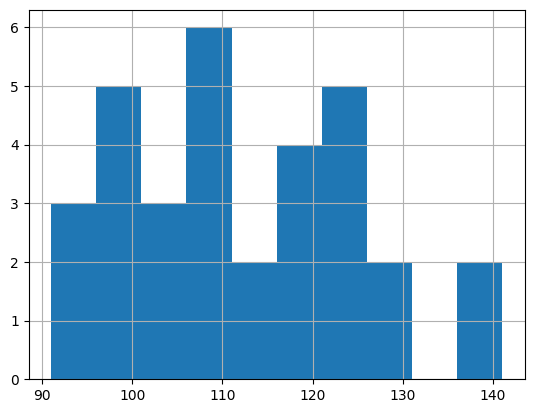

In [68]:
brain_obs_sessions["age_in_days"].sort_values().hist(bins=10)

<Axes: >

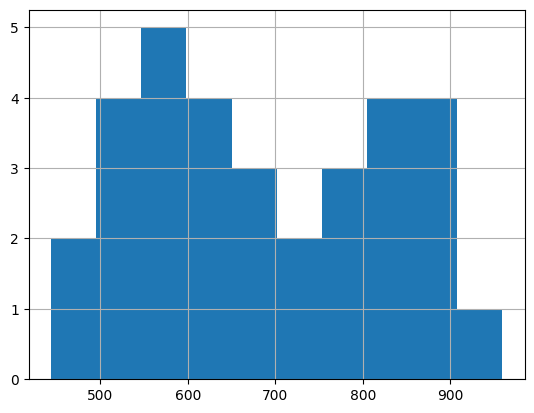

In [71]:
brain_obs_sessions["unit_count"].hist()

<Axes: >

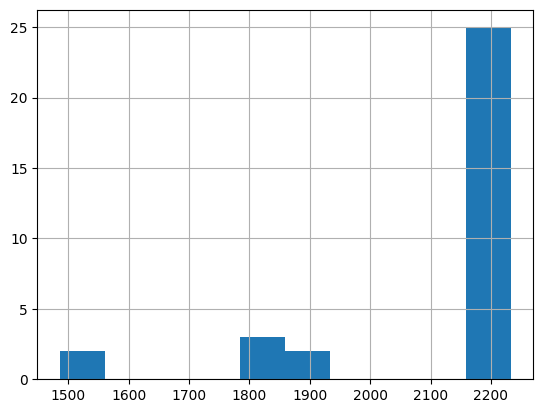

In [73]:
brain_obs_sessions["channel_count"].hist()

<Axes: >

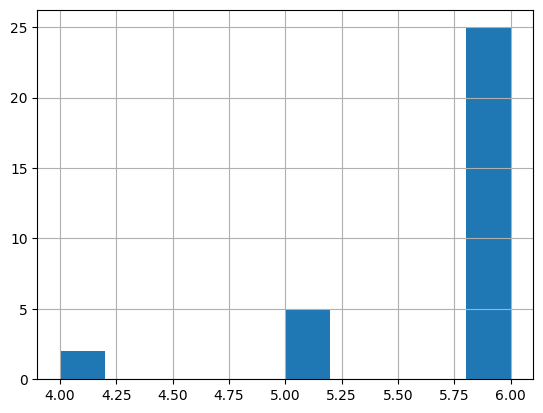

In [74]:
brain_obs_sessions["probe_count"].hist()

In [82]:
brain_obs_sessions[["age_in_days", "unit_count", "probe_count"]].corr()

,age_in_days,unit_count,probe_count
age_in_days,1.000000,-0.261411,0.113176
unit_count,-0.261411,1.000000,0.133685
probe_count,0.113176,0.133685,1.000000


Let's only keep the upper half of sessions, those with at least 650 units. Let's also specify the regions we want to explore: VISp, VISl, VISal, VISpm, and VISam.

In [85]:
uh_brain_obs_sessions = brain_obs_sessions[(brain_obs_sessions["unit_count"] >= 650)]

required_regions = {"VISp", "VISl", "VISal", "VISpm", "VISam"}
regions_uh_brain_obs_sessions = uh_brain_obs_sessions[
    uh_brain_obs_sessions["ecephys_structure_acronyms"].apply(
        lambda x: all(region in str(x) for region in required_regions)
    )
]

regions_uh_brain_obs_sessions

,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
719161530,2019-10-03T00:00:00Z,703279284,brain_observatory_1.1,122.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,755,2214,6,"[TH, Eth, APN, POL, LP, DG, CA1, VISpm, nan, N..."
750332458,2019-10-03T00:00:00Z,726141251,brain_observatory_1.1,91.0,M,wt/wt,902,2216,6,"[grey, VISrl, nan, VISal, IntG, IGL, LGd, CA3,..."
750749662,2019-10-03T00:00:00Z,726162197,brain_observatory_1.1,92.0,M,wt/wt,761,2223,6,"[LP, DG, CA1, VISp, nan, LGd, CA3, VISrl, VPM,..."
755434585,2019-10-03T00:00:00Z,730760270,brain_observatory_1.1,100.0,M,Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,650,2220,6,"[grey, VISrl, nan, MGv, MGd, TH, LGd, CA3, DG,..."
756029989,2019-10-03T00:00:00Z,734865738,brain_observatory_1.1,96.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,684,2214,6,"[TH, DG, CA3, CA1, VISl, nan, PO, Eth, LP, VIS..."


Great! We have narrowed it down to 5 sessions. Let's download the first session, id="719161530".

In [88]:
session = cache.get_session_data(798911424)

Downloading:   0%|          | 5.47M/3.07G [00:24<48:17, 1.06MB/s]

In [16]:
table = session.get_stimulus_table()

table["stimulus_name"].unique()

array(['spontaneous', 'gabors', 'flashes', 'drifting_gratings',
       'natural_movie_three', 'natural_movie_one', 'static_gratings',
       'natural_scenes', 'drifting_gratings_contrast'], dtype=object)

In [17]:
table.head()

,stimulus_block,start_time,stop_time,x_position,size,phase,y_position,spatial_frequency,orientation,color,temporal_frequency,contrast,frame,stimulus_name,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,,,,,,,,,,
0,null,24.875987,84.942787,null,null,null,null,null,null,null,null,null,null,spontaneous,60.066800,0
1,0.0,84.942787,85.176306,20.0,"[20.0, 20.0]","[3644.93333333, 3644.93333333]",-10.0,0.08,90.0,null,4.0,0.8,null,gabors,0.233519,1
2,0.0,85.176306,85.426505,30.0,"[20.0, 20.0]","[3644.93333333, 3644.93333333]",40.0,0.08,0.0,null,4.0,0.8,null,gabors,0.250199,2
3,0.0,85.426505,85.676704,40.0,"[20.0, 20.0]","[3644.93333333, 3644.93333333]",-30.0,0.08,45.0,null,4.0,0.8,null,gabors,0.250199,3
4,0.0,85.676704,85.926904,0.0,"[20.0, 20.0]","[3644.93333333, 3644.93333333]",-40.0,0.08,90.0,null,4.0,0.8,null,gabors,0.250199,4


### Check value counts for each stimulus

In [ ]:
print("719161530")
table["stimulus_name"].value_counts()

719161530


natural_movie_three     36000
natural_movie_one       18000
static_gratings          6000
natural_scenes           5950
gabors                   3596
drifting_gratings         628
flashes                   150
invalid_presentation       49
spontaneous                15
Name: stimulus_name, dtype: int64

For the stimuli we are interested in, static and drifting gratings we have 6000 and 628 measurements respectively. Let's check the value counts for one more session, id="750332458"

In [ ]:
id2 = 750332458
session2 = cache.get_session_data(id2)

In [62]:
print(id2)
table2 = session2.get_stimulus_table()
table2["stimulus_name"].value_counts()

750332458


natural_movie_three    36000
natural_movie_one      18000
static_gratings         6000
natural_scenes          5950
gabors                  3645
drifting_gratings        630
flashes                  150
spontaneous               15
Name: stimulus_name, dtype: int64

Again a similar value at 6000 and 630 for the gratings. Due to the fact that Let's move forward with session 750332458.